## Question 1
### Rocket_Motor

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

#### Fitting of Simple Linear Regression Model

In [2]:
# Load data into a pandas DataFrame
data =pd.read_csv('Rocket_motor_data.csv', index_col=0)
data

,Shear Strength y (psi),Age of Propellant x (weeks)
Observation i,,
1,2158.70,15.50
2,1678.15,23.75
3,2316.00,8.00
4,2061.30,17.00
5,2207.50,5.50
6,1708.30,19.00
7,1784.70,24.00
8,2575.00,2.50
9,2357.90,7.50


In [3]:
X = data[['Age of Propellant x (weeks)']]
y = data['Shear Strength y (psi)']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
print("Intercept= ", round(model.intercept_, 4))
print("Slope= ", round(model.coef_[0], 4))

Intercept=  2626.2518
Slope=  -37.1109


<Axes: xlabel='Age of Propellant x (weeks)', ylabel='Shear Strength y (psi)'>

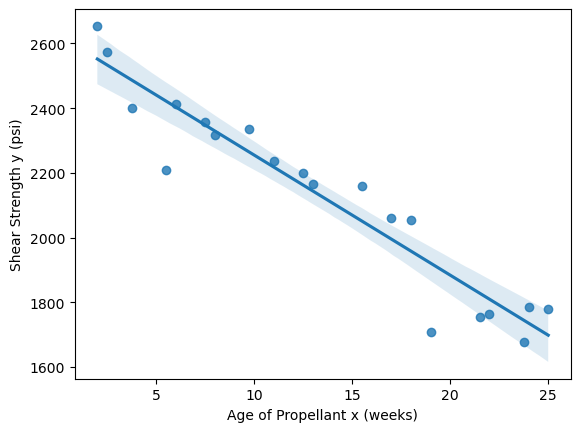

In [4]:
sns.regplot(x = X, y= y, data = data)

#### Test of Hypothesis

In [13]:
# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Shear Strength y (psi)   R-squared:                       0.902
Model:                                OLS   Adj. R-squared:                  0.897
Method:                     Least Squares   F-statistic:                     166.1
Date:                    Mon, 25 Mar 2024   Prob (F-statistic):           1.58e-10
Time:                            01:08:41   Log-Likelihood:                -118.57
No. Observations:                      20   AIC:                             241.1
Df Residuals:                          18   BIC:                             243.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [14]:
print(model.conf_int(0.05))

                                       0            1
const                        2533.739344  2718.764218
Age of Propellant x (weeks)   -43.160113   -31.061669


# Conclusion
## Shear Strength = 2626.25 - 37.11(Age of Propellant)

- Here the model tells us that 1 week change in Age of Propellant there will be an average decrease of 37.11 in Shear Strength, but when the Age of Propellant is zero or constant there will be an average increase of 2626.25 in the Shear Strength.
- The p-value which is less than 0.05 shows that there is a statistically significant associtation between the Shear Strength and Age of Propellant.
- R-squared value tells us that the 90.2% vairation can be explained by the Age of Propellant variable.
- Here, F statistics and corresponding p-values tell us the overall significance of the regression model that is whether explanatory variable in the model are useful for explaining the variation in response variable. Since p-value in the model is less than the 0.05 therefore our model is statistically significant, thus the regressor i.e, Age of Propellant is usefull in explaining the variation of the Shear Strength.


## Question 2
### Soft Drinks

In [5]:
df = pd.read_csv("soft_drink.csv", index_col='obs')
df

,Delivery Time,Number of Cases,Distance
obs,,,
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150
6,18.11,7,330
7,8.00,2,110
8,17.83,7,210
9,79.24,30,1460


In [6]:
X = df[['Number of Cases', 'Distance']]
y = df['Delivery Time']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
print("Intercept= ", round(model.intercept_, 4))
print("Slope= ", round(model.coef_[0], 4))

Intercept=  1.5509
Slope=  1.3248


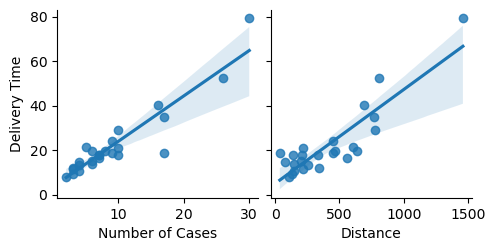

In [17]:
feature = ['Number of Cases', 'Distance']

sns.pairplot(df, x_vars=feature, y_vars= 'Delivery Time', kind='reg')


In [9]:
# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery Time   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     219.5
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.93e-15
Time:                        00:07:51   Log-Likelihood:                -65.496
No. Observations:                  25   AIC:                             137.0
Df Residuals:                      22   BIC:                             140.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5509      1.221     

In [9]:
# Print the confidence intervals for the model coefficients
print(results.conf_int(alpha=0.05))

                        0         1
const           -0.981496  4.083376
Number of Cases  1.014923  1.634601
Distance         0.014523  0.027982


## Delivery Time  = 1.55 + 1.32(Number of Cases) + 0.02(Distance)

- Here the model tells us that the 1 unit change of Number of cases will show an average increase of 1.32 time in delivery time keeping distance zero, when there is 1km change in distance will show an average increase of 0.02 time in delivery time, when number of cases and distance is zero an average increase of 1.55 time of delivery time will be seen.
- The p-value of the constant term is greater than alpha (like 0.2 in your example), the model can still be considered statistically significant if the predictor variables (number of cases and distance) are less than 0.05.
- R-squared value tells us that the 95.2% vairation can be explained.
- Here, F statistics and corresponding p-values tell us the overall significance of the regression model that is whether explanatory variable in the model are useful for explaining the variation in response variable. Since p-value(of number of cases and distance) in the model is less than the 0.05 therefore our model is statistically significant, thus the regressor i.e, Age of Propellant is usefull in explaining the variation of the Shear Strength.
